# **STATISTICAL ANALYSIS FOR THE 2023 SPOTIFY DATASET**
### **Table of Contents**
* [<span style="color:#A690A4"> 0. Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collecting and Exploring the Dataset](#process)
* [<span style="color:#A690A4"> 3. Analyze & Visualization: Data Analysis](#analyze)

### Objective & Scope
* Collect, clean & analyze the 2023 Spotify dataset
* Identify variable of interest
* Allow businesses to make data-driven decisions based on the given dataset
* Share findings and insights

### Methodology
* **Collect** data using "top-spotify-songs-2023"
* **Wrangle** data using preprocessing, cleaning, transforming and organizing data for further analysis including predictive.
* **Explore** data using available techniques
* **Visualize** data to uncover insightful discoveries


### Key Findings
* BPM plays a bigger role than the rest. It has been found:
    - Best range is between 110 and 90.
    - Overall average is 122.
    - Top 10 BPM: average is 117, with a high standard deviation (+34). Majority of Top 10 below 110.
    - Top 10 BPM minimum is 90 and minimum overall is 65.


* Energy Score, you need to share at least a minimum of energy to be successful:
    - Top 10: smallest standard deviation, ranging from 78 to 45 with an average of 59.6, smaller than the overall.
    - Optimal range: 78 to 45

## <span style="color:#5E6997"> Introduction </span> <a class="anchor" id="intro"></a>

**Leading questions are:**
1. What makes a song, a good song according to the dataset?
2. Can we identify variables of interest that can be used to predict wether or not (True or False) a song will make it the top top 50, top 100, top 500?
3. Can the data be transformed for Binary Classification algorithms ?

**Data Source**:
Data has been grabbed using Spotify API by Nidula Elgiriyewithana and uploaded to Kaggle.


First of all, we will import the packages:

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# from scipy.stats import pearsonr
# from scipy import stats
# from sklearn.preprocessing import MinMaxScaler



## <span style="color:#5E6997"> **About the dataset: Collecting and exploring the data** </span> <a class="anchor" id="process"></a>



In [437]:
dataset = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
dataset.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


The dataset is a complex one, so we need to perform some data cleaning and modelling:
1. First of all, we will create a copy and select only the columns that interest us in our study


In [438]:
dataset_copy = dataset.copy() #get a copy
songs = dataset_copy[['track_name', 'artist(s)_name','streams','released_year', 'bpm','danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','key']]
songs.head()


,track_name,artist(s)_name,streams,released_year,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,2023,125,80,89,83,31,0,8,4,B
1,LALA,Myke Towers,133716286,2023,92,71,61,74,7,0,10,4,C#
2,vampire,Olivia Rodrigo,140003974,2023,138,51,32,53,17,0,31,6,F
3,Cruel Summer,Taylor Swift,800840817,2019,170,55,58,72,11,0,11,15,A
4,WHERE SHE GOES,Bad Bunny,303236322,2023,144,65,23,80,14,63,11,6,A


2. We are cleaning the data using the dropna() function, so basically removing empty values. Also, we will remove any duplicates.

In [439]:
songs= songs.dropna()
duplicates = songs[songs[['track_name','artist(s)_name']].duplicated()]
songs = songs.drop(duplicates.index.tolist())
songs.reset_index(drop=True, inplace=True) #reset index



3. then, we will add an unique id for each song

In [440]:

track_name_to_id = {name: idx for idx, name in enumerate(songs['track_name'].unique())}

songs['track_id'] = songs['track_name'].map(track_name_to_id)
songs.insert(0, 'Index', songs['track_id'])
songs.drop(columns=['track_id'], inplace=True)

# also, we convert the streams column to int
songs['streams'] = pd.to_numeric(songs['streams'], errors='coerce').astype('Int64')
#remove the songs where the streams column is not int
songs = songs[(songs['streams'].notnull()) & (songs['streams'] % 1 == 0)]

# Reset the index if needed
songs = songs.reset_index(drop=True)

4. we will format the columns and rename them, so they match with our 2020 spotify study

In [441]:

re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'
}
songs.rename(columns=re_col, inplace=True)
songs.head()

,Index,track_name,artist(s)_name,streams,released_year,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,2023,125,80,89,83,31,0,8,4,B
1,1,LALA,Myke Towers,133716286,2023,92,71,61,74,7,0,10,4,C#
2,2,vampire,Olivia Rodrigo,140003974,2023,138,51,32,53,17,0,31,6,F
3,3,Cruel Summer,Taylor Swift,800840817,2019,170,55,58,72,11,0,11,15,A
4,4,WHERE SHE GOES,Bad Bunny,303236322,2023,144,65,23,80,14,63,11,6,A


## **Data visualisation**

We check how many rows and how many columns we have in our .csv now:

In [442]:
songs.shape

(854, 14)

We check what are the names of the columns we have in our database:

In [443]:
songs.columns

Index(['Index', 'track_name', 'artist(s)_name', 'streams', 'released_year',
       'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key'],
      dtype='object')

We check the datatypes of each column

In [444]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             854 non-null    int64 
 1   track_name        854 non-null    object
 2   artist(s)_name    854 non-null    object
 3   streams           854 non-null    Int64 
 4   released_year     854 non-null    int64 
 5   bpm               854 non-null    int64 
 6   danceability      854 non-null    int64 
 7   valence           854 non-null    int64 
 8   energy            854 non-null    int64 
 9   acousticness      854 non-null    int64 
 10  instrumentalness  854 non-null    int64 
 11  liveness          854 non-null    int64 
 12  speechiness       854 non-null    int64 
 13  key               854 non-null    object
dtypes: Int64(1), int64(10), object(3)
memory usage: 94.4+ KB


We are going to display the count, mean, standard deviation, minimum, maximum and the values of the 3 quantiles for the data in every column:

In [445]:
songs.describe()

,Index,streams,released_year,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
count,854.000000,854.0,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000
mean,424.778689,513450907.050351,2018.285714,122.810304,67.241218,51.186183,64.325527,26.713115,1.593677,18.173302,10.411007
std,246.177195,572391694.554691,11.008591,28.203358,14.665009,23.624391,16.075784,25.705901,8.562302,13.578064,10.105582
min,0.000000,2762.0,1930.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,212.250000,138686702.5,2020.000000,100.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,423.500000,284802848.5,2022.000000,121.000000,70.000000,51.000000,65.500000,18.000000,0.000000,12.000000,6.000000
75%,637.750000,674004814.0,2022.000000,141.750000,78.000000,70.000000,76.000000,42.000000,0.000000,24.000000,12.000000
max,851.000000,3703895074.0,2023.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


We use histograms to visualise the data:

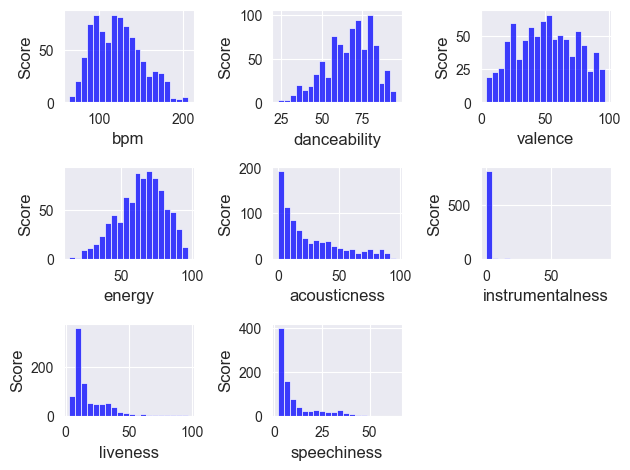

In [446]:
columns_to_plot = ['streams','bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=songs, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

# <span style="color:#5E6997"> Data Analysis </span> <a class="anchor" id="analyze"></a>

Now that the data is clean, we are ready to analyse it. We are going to loook at:
- which are the most streamed songs;
- which are the most streamed artists;
- how many songs does each artist have in the list of most streamed songs;
- what is the correlation between the popularity/number of streams a song has and danceability, energy, valence, loudness, acoustics, speechiness, liveness and bpm

In [447]:
most_streamed_songs = songs[['artist(s)_name','track_name','streams']].nlargest(10,'streams')
display(most_streamed_songs)

,artist(s)_name,track_name,streams
49,The Weeknd,Blinding Lights,3703895074
159,Ed Sheeran,Shape of You,3562543890
78,Lewis Capaldi,Someone You Loved,2887241814
552,Tones and I,Dance Monkey,2864791672
37,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550
145,"Drake, WizKid, Kyla",One Dance,2713922350
76,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2665343922
128,Imagine Dragons,Believer,2594040133
648,"The Chainsmokers, Halsey",Closer,2591224264
42,"The Weeknd, Daft Punk",Starboy,2565529693


Here are the top 10 songs with the most streams on Spotify ( of all time):


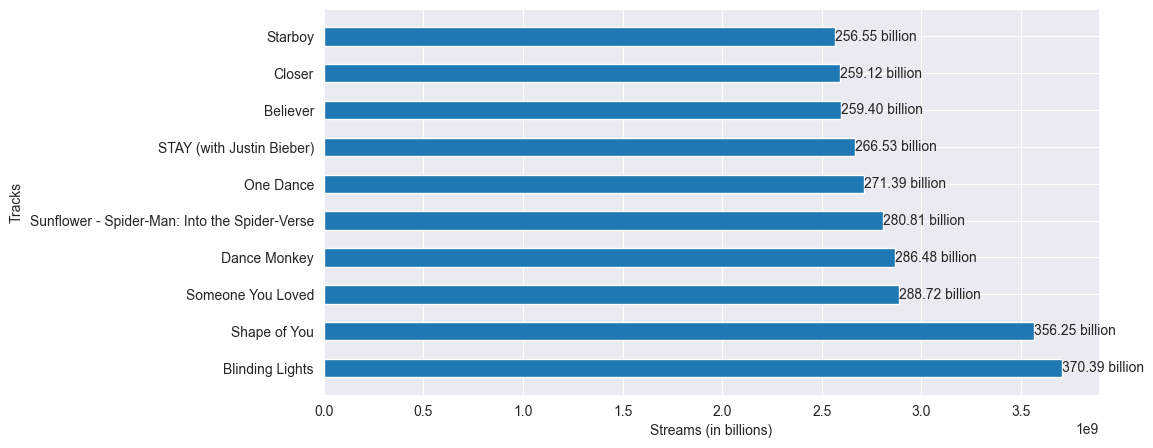

In [448]:
top_10_streams = songs.nlargest(10, 'streams')
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.barh(top_10_streams['track_name'], top_10_streams['streams'], height = 0.5);
ax.set(xlabel='Streams (in billions)',ylabel= 'Tracks')
ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**7:.2f} billion')
#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)

**Top Artists**


C:\Users\40756\AppData\Local\Temp\ipykernel_13692\3906305774.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


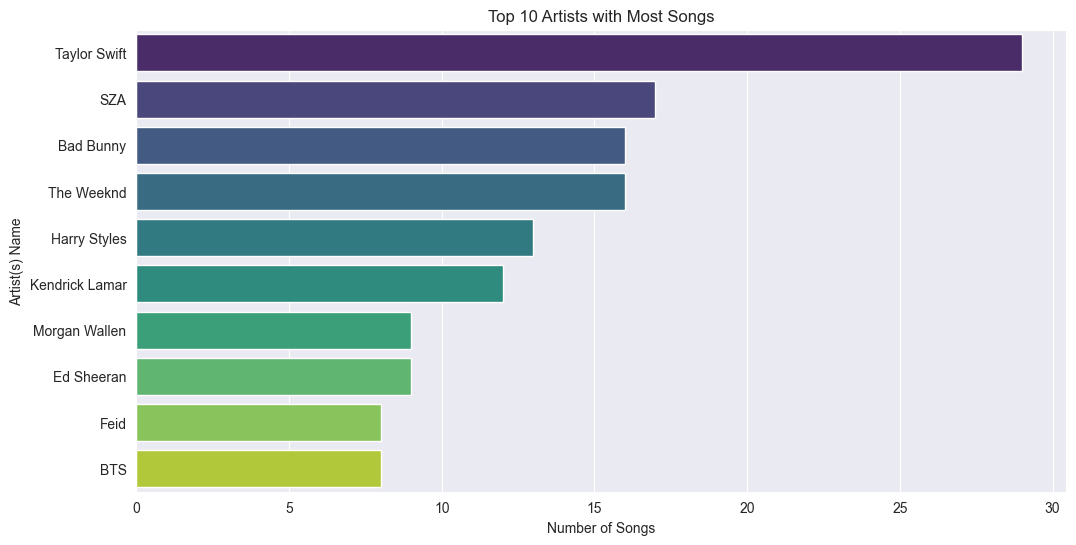

artist(s)_name
Taylor Swift      29
SZA               17
Bad Bunny         16
The Weeknd        16
Harry Styles      13
Kendrick Lamar    12
Morgan Wallen      9
Ed Sheeran         9
Feid               8
BTS                8
Name: count, dtype: int64

In [449]:
# Top 10 artists with most songs in the dataset
top_artists = songs['artist(s)_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

top_artists

In [450]:
total_appearances = len(songs)
artist_appearances_count = songs['artist(s)_name'].value_counts().reset_index()
artist_appearances_count.columns = ['artist(s)_name', 'count']
artist_appearances_count['percentage_of_total'] = (artist_appearances_count['count'] / total_appearances) * 100
most_appeared_artists_percentage = artist_appearances_count.nlargest(10, 'percentage_of_total')
display(most_appeared_artists_percentage)

,artist(s)_name,count,percentage_of_total
0,Taylor Swift,29,3.395785
1,SZA,17,1.990632
2,Bad Bunny,16,1.873536
3,The Weeknd,16,1.873536
4,Harry Styles,13,1.522248
5,Kendrick Lamar,12,1.405152
6,Morgan Wallen,9,1.053864
7,Ed Sheeran,9,1.053864
8,Feid,8,0.936768
9,BTS,8,0.936768


It appears that Taylor Swift is the top artist, having 3.39% of the top songs on spotify.
# ---------------------------------------------------------------------------------------------------------------
## What does it take to hit the charts?
- we can use a correlation matrix and heatmap to determine how much the parameters influence each other.


In [451]:
columns_to_correlate = ['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness',
                        'liveness', 'speechiness']

correlation_matrix = songs[columns_to_correlate].corr()
print(correlation_matrix)

                   streams       bpm  danceability   valence    energy  \
streams           1.000000 -0.001303     -0.101138 -0.043076 -0.030093   
bpm              -0.001303  1.000000     -0.161946  0.027563  0.017311   
danceability     -0.101138 -0.161946      1.000000  0.397101  0.165503   
valence          -0.043076  0.027563      0.397101  1.000000  0.346638   
energy           -0.030093  0.017311      0.165503  0.346638  1.000000   
acousticness      0.010634 -0.012010     -0.238962 -0.065167 -0.561797   
instrumentalness -0.042213 -0.009267     -0.099697 -0.145043 -0.049075   
liveness         -0.055164 -0.001537     -0.095193  0.009844  0.103033   
speechiness      -0.113038  0.046828      0.197933  0.041374 -0.024927   

                  acousticness  instrumentalness  liveness  speechiness  
streams               0.010634         -0.042213 -0.055164    -0.113038  
bpm                  -0.012010         -0.009267 -0.001537     0.046828  
danceability         -0.238962       

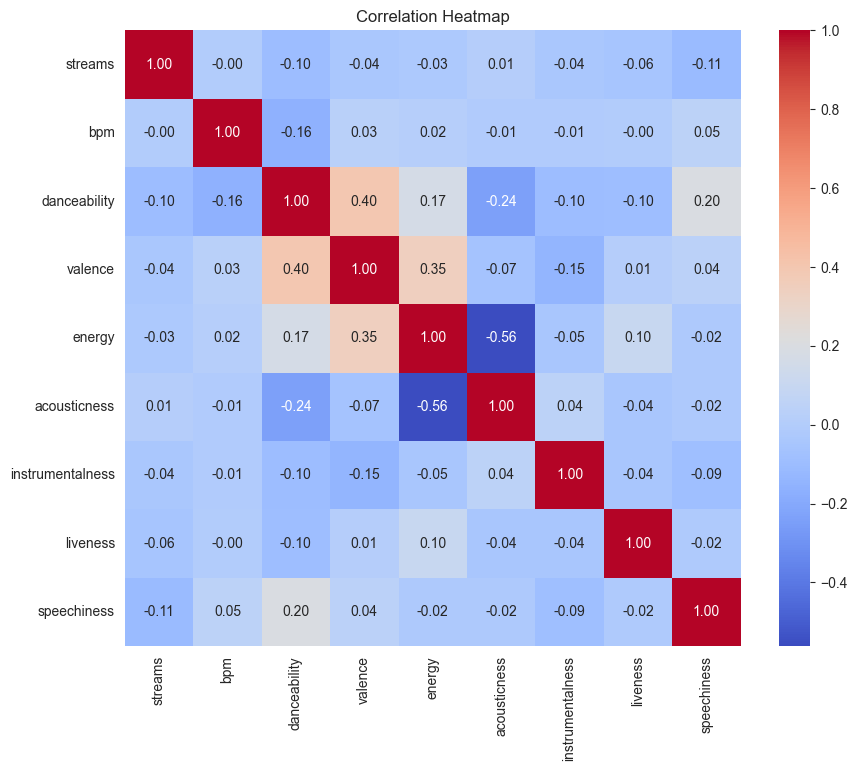

In [452]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

# Overview

The matrix unveiled intriguing relationships that offer valuable insights into the factors influencing a song's appeal and reception.

# Streams and Key Characteristics:

- **Danceability, Loudness, and Speechiness:** These exhibit weak negative correlations with the number of streams, suggesting a nuanced inverse relationship. However, the practical impact of these correlations on stream counts may be limited.

# Danceability and Valence:

A noteworthy finding is the moderate positive correlation between danceability and valence. This implies that, when crafting a danceable song, a more positive or cheerful mood (valence) is likely to enhance its appeal.

# Energetic Songs and Acousticness:

We identified a moderate negative correlation between acousticness and energy, highlighting that songs with fewer acoustic elements and more electronic components tend to possess higher energy levels. This insight guides decisions in creating more vibrant and energetic musical compositions.

# Loudness and Energy:

The analysis uncovered a robust positive correlation between song loudness and energy levels. This signifies that louder songs are associated with heightened energy, underscoring the importance of considering loudness in achieving specific energy goals during music production.

# Additional Insights:

- **Acousticness:** Displays a strong negative correlation with energy, indicating that reduced acoustic elements contribute to higher energy levels.
- **Speechiness:** Exhibits a weak negative correlation with streams, suggesting a subtle influence on stream counts as speechiness increases.
- **Danceability:** Demonstrates a moderate negative correlation with acousticness, emphasizing that more danceable songs tend to incorporate fewer acoustic elements.
- **Valence:** Shows a moderate positive correlation with danceability, reinforcing the connection between danceable tunes and a positive or cheerful mood.


# Descriptive statistics
We can take a better look at our data with some scatter plots

C:\Users\40756\AppData\Local\Temp\ipykernel_13692\377941518.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')


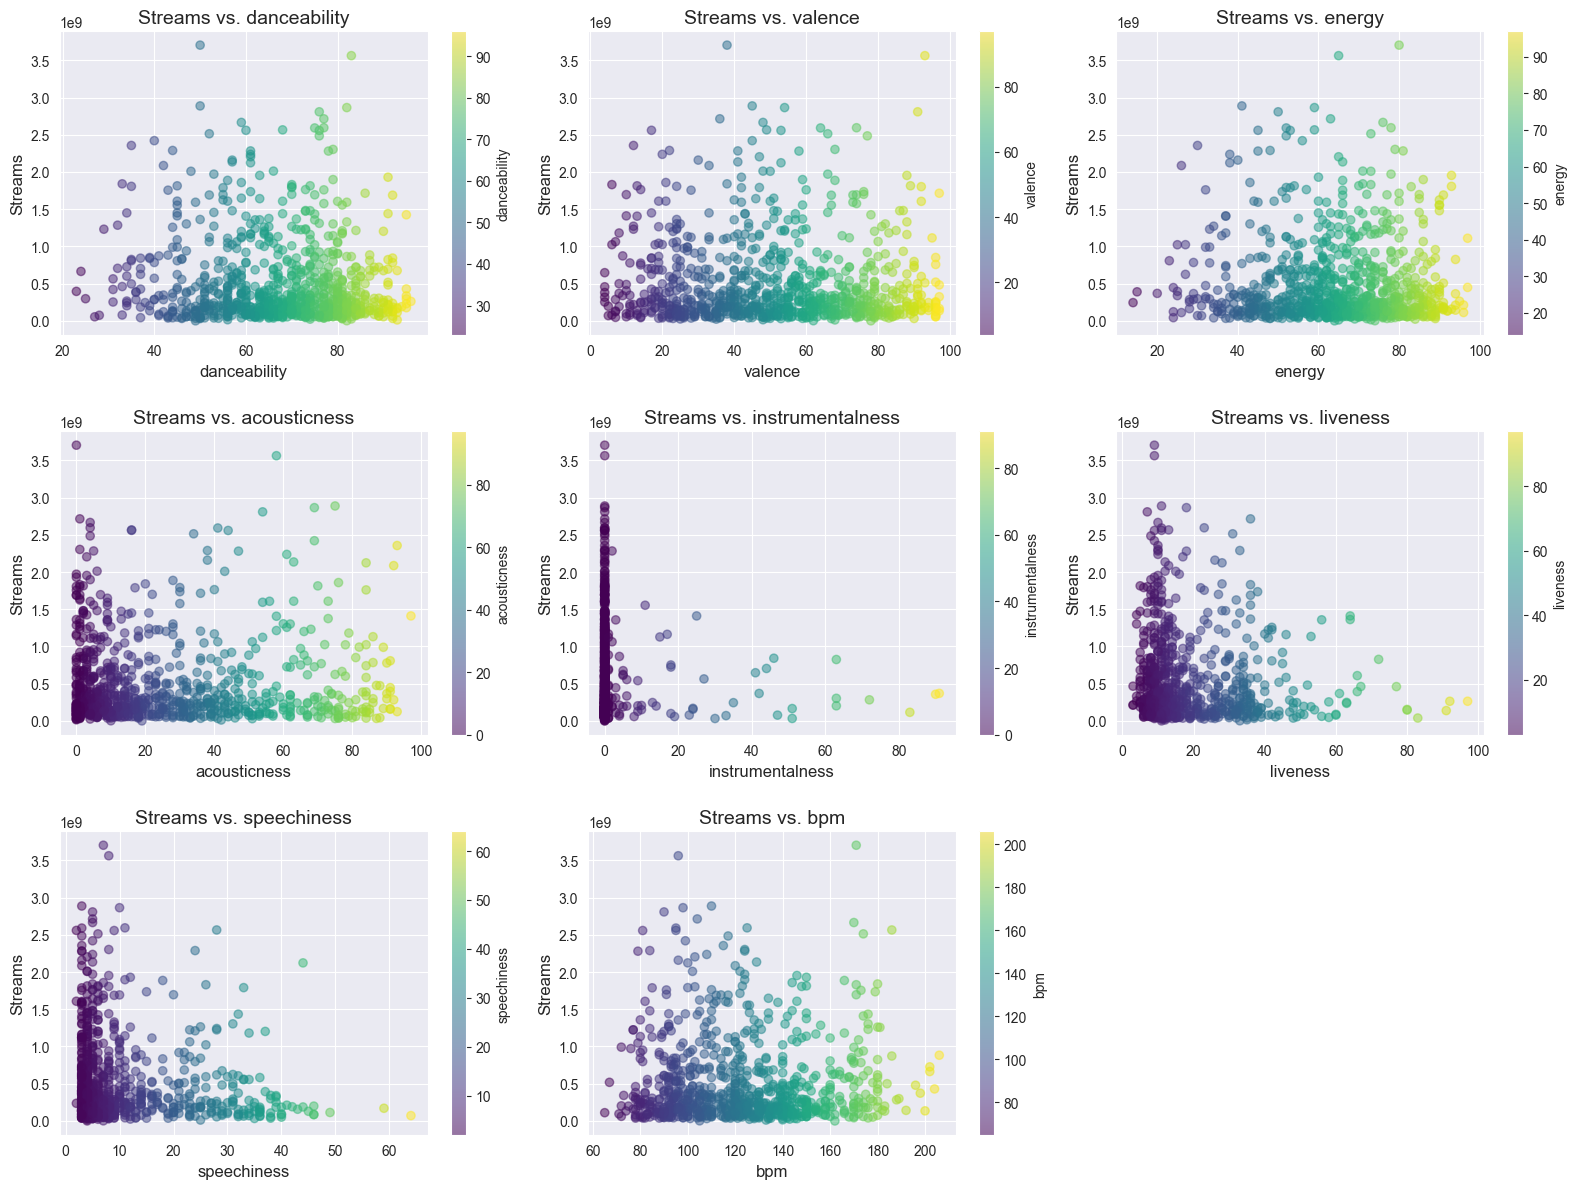

In [453]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness','bpm']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(songs[column], songs['streams'], c=songs[column], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


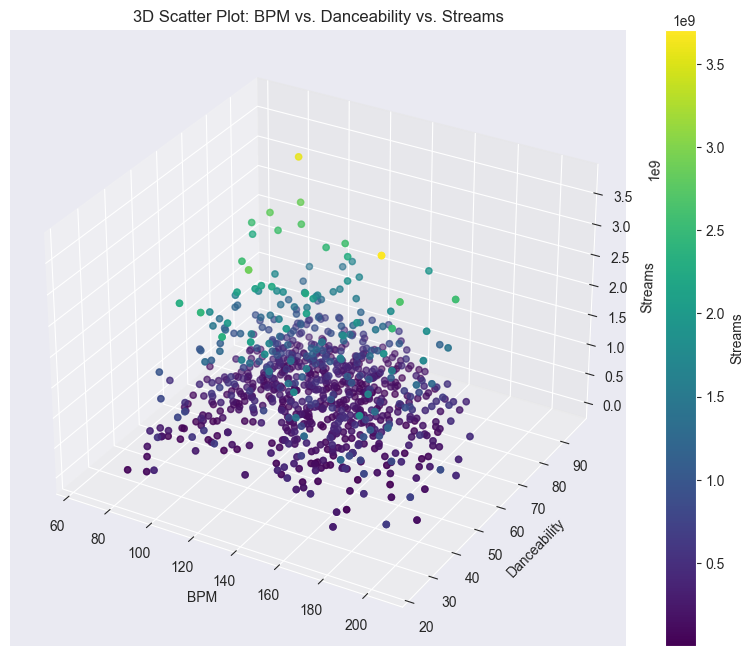

In [454]:
bpm = songs['bpm']
danceability = songs['danceability']
streams = songs['streams']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(bpm, danceability, streams, c=streams, cmap='viridis', marker='o')
ax.set_xlabel('BPM')
ax.set_ylabel('Danceability')
ax.set_zlabel('Streams')

cbar = fig.colorbar(ax.scatter(bpm, danceability, streams, c=streams, cmap='viridis', marker='o'), ax=ax)
cbar.set_label('Streams', rotation=90)
plt.title('3D Scatter Plot: BPM vs. Danceability vs. Streams')
plt.show()

We will analyse what it takes to hit the charts, so we will divide our dataset to multiple subsets:

In [455]:
top_10_songs = songs.nlargest(10, 'streams')
top_50_songs = songs.nlargest(50, 'streams')
top_100_songs = songs.nlargest(100, 'streams')
top_200_songs = songs.nlargest(200, 'streams')
top_500_songs = songs.nlargest(500, 'streams')
top_700_songs = songs.nlargest(700, 'streams')


last_10_songs = songs.nsmallest(10, 'streams')
last_50_songs = songs.nsmallest(50, 'streams')
last_100_songs = songs.nsmallest(100, 'streams')
last_200_songs = songs.nsmallest(200, 'streams')
last_500_songs = songs.nsmallest(500, 'streams')

We can see some statistical information about the top 100 songs:

In [456]:
display(top_100_songs.describe())

,Index,streams,released_year,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,329.900000,1808944528.14,2013.090000,122.980000,63.300000,49.220000,64.500000,26.040000,0.410000,17.48000,8.340000
std,219.689335,516394291.649255,9.754662,29.825411,14.812294,23.654747,16.409224,27.998889,2.738041,12.63751,8.228087
min,13.000000,1223481149.0,1975.000000,77.000000,29.000000,6.000000,26.000000,0.000000,0.000000,4.00000,2.000000
25%,137.000000,1420964383.5,2012.000000,99.750000,53.000000,29.500000,52.000000,2.750000,0.000000,9.00000,4.000000
50%,328.000000,1691545459.5,2017.000000,117.000000,63.000000,49.000000,66.000000,14.000000,0.000000,12.00000,5.000000
75%,526.500000,2095420578.25,2020.000000,144.000000,75.000000,66.250000,77.000000,44.750000,0.000000,24.00000,9.000000
max,812.000000,3703895074.0,2022.000000,186.000000,95.000000,97.000000,93.000000,97.000000,25.000000,64.00000,44.000000


# Analysis : BPM


In [457]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700']
last_dataframes = [last_10_songs, last_50_songs, last_100_songs, last_200_songs, last_500_songs]
last_labels = ['Last 10', 'Last 50', 'Last 100', 'Last 200', 'Last 500']

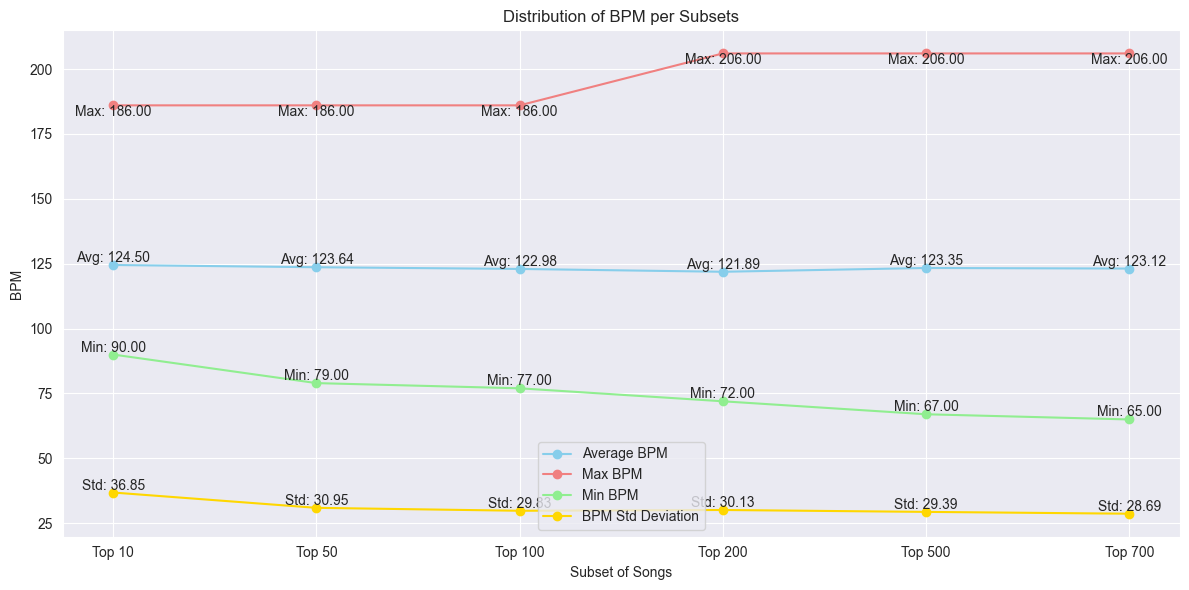

In [458]:
bpm_min = []
bpm_max = []
bpm_avg = []
bpm_std = []

for df in dataframes:
    bpm_min.append(df['bpm'].min())
    bpm_max.append(df['bpm'].max())
    bpm_avg.append(df['bpm'].mean())
    bpm_std.append(df['bpm'].std())

plt.figure(figsize=(12, 6))

# Line for average BPM
plt.plot(labels, bpm_avg, marker='o', linestyle='-', color='skyblue', label='Average BPM')

# Line for max BPM
plt.plot(labels, bpm_max, marker='o', linestyle='-', color='lightcoral', label='Max BPM')

# Line for min BPM
plt.plot(labels, bpm_min, marker='o', linestyle='-', color='lightgreen', label='Min BPM')

# Line for std BPM
plt.plot(labels, bpm_std, marker='o', linestyle='-', color='gold', label='BPM Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('BPM')
plt.title('Distribution of BPM per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(bpm_avg, bpm_max, bpm_min, bpm_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [459]:
for label, avg, max_val, min_val, std_val in zip(labels, bpm_avg, bpm_max, bpm_min, bpm_std):
    print(f'{label}: Avg={avg:.2f}, Max={max_val:.2f}, Min={min_val:.2f}, Std={std_val:.2f}')

Top 10: Avg=124.50, Max=186.00, Min=90.00, Std=36.85
Top 50: Avg=123.64, Max=186.00, Min=79.00, Std=30.95
Top 100: Avg=122.98, Max=186.00, Min=77.00, Std=29.83
Top 200: Avg=121.89, Max=206.00, Min=72.00, Std=30.13
Top 500: Avg=123.35, Max=206.00, Min=67.00, Std=29.39
Top 700: Avg=123.12, Max=206.00, Min=65.00, Std=28.69


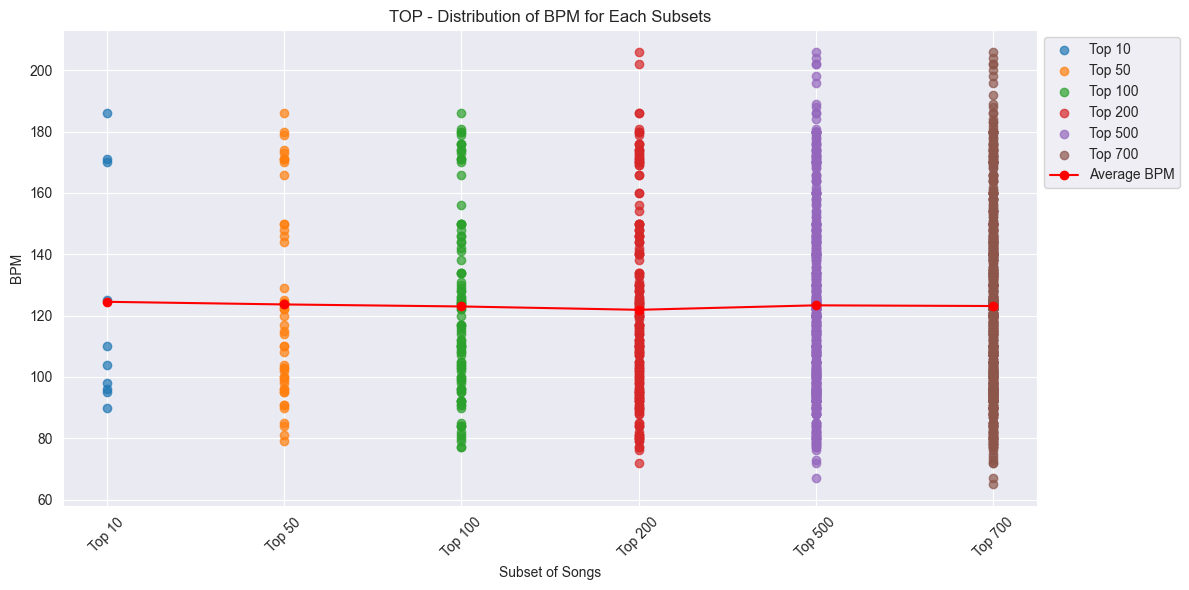

In [460]:
plt.figure(figsize=(12, 6))
bpm_avg = []

for i, df in enumerate(dataframes):
    plt.scatter([i] * len(df), df['bpm'], label=labels[i], alpha=0.7)
    avg = df['bpm'].mean()
    bpm_avg.append(avg)

plt.plot(range(len(dataframes)), bpm_avg, marker='o', linestyle='-', color='red', label='Average BPM')
plt.xlabel('Subset of Songs')
plt.ylabel('BPM')
plt.title('TOP - Distribution of BPM for Each Subsets')
plt.xticks(range(len(dataframes)), labels, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# ----------------------------------------- Summary ------------------------------------------------------

In summary, the analysis of BPM statistics across different subsets of songs based on stream counts reveals several noteworthy insights:

## Average BPM Trends:

- There is a consistent decrease in average BPM as the size of the subset increases, suggesting a potential correlation between lower tempo and higher stream counts.

## Maximum BPM Consistency:

- The maximum BPM remains relatively constant across all subsets, indicating a common upper limit for song tempos irrespective of popularity.

## Minimum BPM Variability:

- The variability in minimum BPM suggests that songs with lower tempos can still achieve high stream counts, challenging the notion that a slower pace hinders popularity.

## Standard Deviation Insights:

- The decreasing standard deviation with larger subsets implies a more consistent tempo profile in popular songs with higher stream counts.
# ---------------------------------------------------------------------------------------------------------------


## Analysis: DANCEABILITY

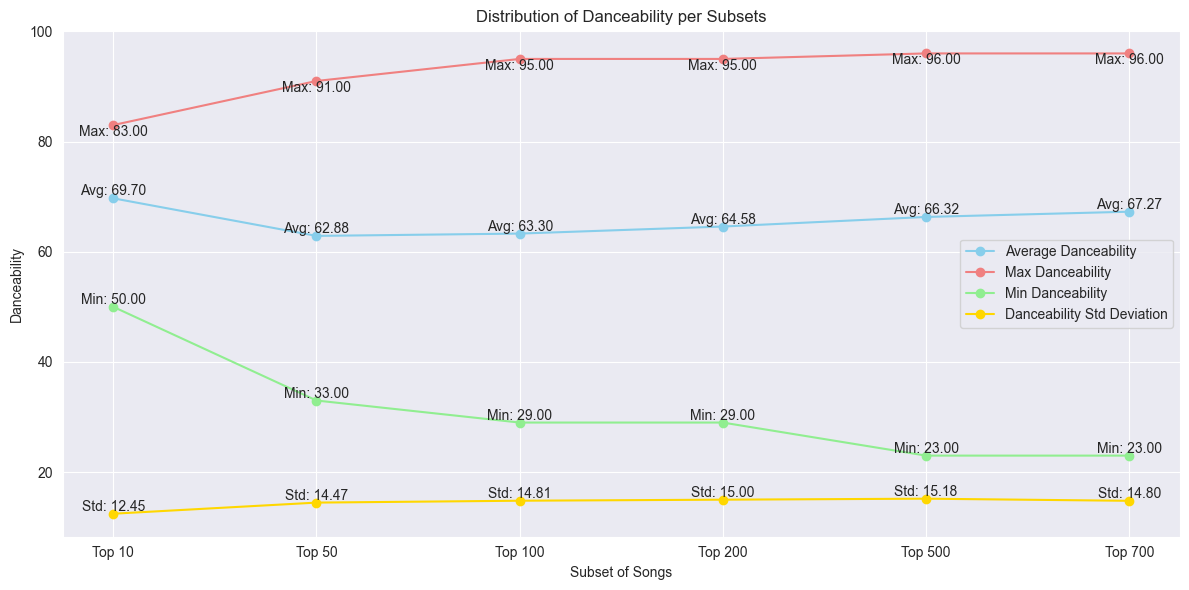

In [461]:
danceability_min = []
danceability_max = []
danceability_avg = []
danceability_std = []

for df in dataframes:
    danceability_min.append(df['danceability'].min())
    danceability_max.append(df['danceability'].max())
    danceability_avg.append(df['danceability'].mean())
    danceability_std.append(df['danceability'].std())

plt.figure(figsize=(12, 6))

# Line for average danceability
plt.plot(labels, danceability_avg, marker='o', linestyle='-', color='skyblue', label='Average Danceability')

# Line for max danceability
plt.plot(labels, danceability_max, marker='o', linestyle='-', color='lightcoral', label='Max Danceability')

# Line for min danceability
plt.plot(labels, danceability_min, marker='o', linestyle='-', color='lightgreen', label='Min Danceability')

# Line for std danceability
plt.plot(labels, danceability_std, marker='o', linestyle='-', color='gold', label='Danceability Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Danceability')
plt.title('Distribution of Danceability per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(danceability_avg, danceability_max, danceability_min, danceability_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

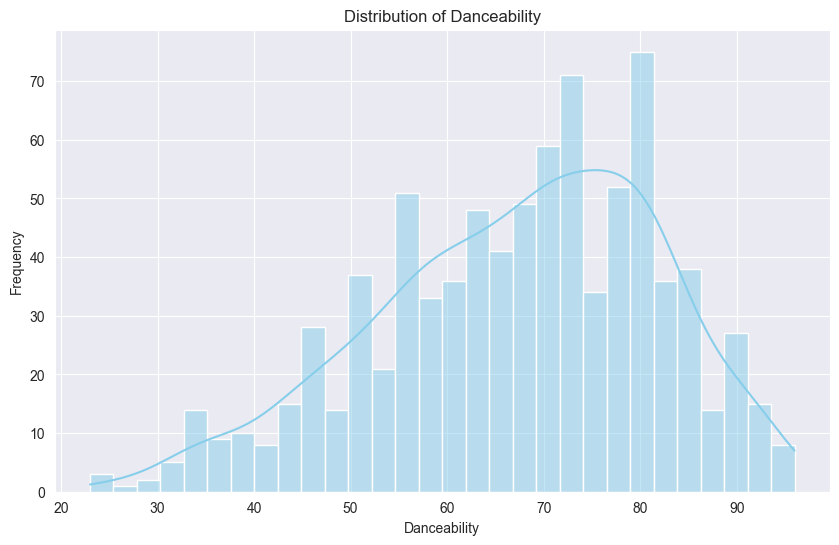

In [462]:
plt.figure(figsize=(10, 6))
sns.histplot(songs['danceability'], bins=30, kde=True, color='skyblue')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.grid(True)
plt.show()

In [463]:
for label, avg, max_val, min_val, std_val in zip(labels, danceability_avg, danceability_max,danceability_max, danceability_std):
    print(f'{label}: Avg={avg:.2f}, Max={max_val:.2f}, Min={min_val:.2f}, Std={std_val:.2f}')

Top 10: Avg=69.70, Max=83.00, Min=83.00, Std=12.45
Top 50: Avg=62.88, Max=91.00, Min=91.00, Std=14.47
Top 100: Avg=63.30, Max=95.00, Min=95.00, Std=14.81
Top 200: Avg=64.58, Max=95.00, Min=95.00, Std=15.00
Top 500: Avg=66.32, Max=96.00, Min=96.00, Std=15.18
Top 700: Avg=67.27, Max=96.00, Min=96.00, Std=14.80


# ----------------------------------------- Summary ------------------------------------------------------

In analyzing danceability statistics across different subsets of songs based on stream counts, several insights emerge:

## Average Danceability Trends:

- There is a noticeable decrease in average danceability as the size of the subset increases, indicating a potential correlation between lower danceability and higher stream counts.

## Maximum Danceability Consistency:

- The maximum danceability remains relatively consistent across all subsets, suggesting a common upper limit for song danceability irrespective of popularity.

## Minimum Danceability Observations:

- The minimum danceability values are consistent across subsets, challenging the notion that lower danceability hinders popularity. Songs with lower danceability can still achieve high stream counts.

## Danceability Standard Deviation Insights:

- The decreasing standard deviation with larger subsets implies a more consistent danceability profile in popular songs with higher stream counts. This suggests a convergence towards a common danceability characteristic within larger popularity tiers.
# ---------------------------------------------------------------------------------------------------------------



# Analysis: Valence

# ----------------------------------------- Summary ------------------------------------------------------

In examining valence statistics across different subsets of songs based on stream counts, key observations are identified:

## Average Valence Trends:

- There is a consistent decrease in average valence as the size of the subset increases, suggesting a potential association between lower valence and higher stream counts.

## Maximum Valence Range:

- The maximum valence remains relatively consistent across all subsets, indicating a broad range of emotional positivity in popular songs, regardless of popularity tier.

## Minimum Valence Observations:

- The minimum valence values show a consistent range across subsets, challenging the notion that lower valence inhibits popularity. Even songs with lower valence can achieve high stream counts.

## Valence Standard Deviation Insights:

- The standard deviation decreases with larger subsets, indicating a convergence towards a more consistent emotional tone in popular songs with higher stream counts. This suggests a commonality in the emotional characteristics within larger popularity tiers.
# ---------------------------------------------------------------------------------------------------------------



# Analysis: Energy

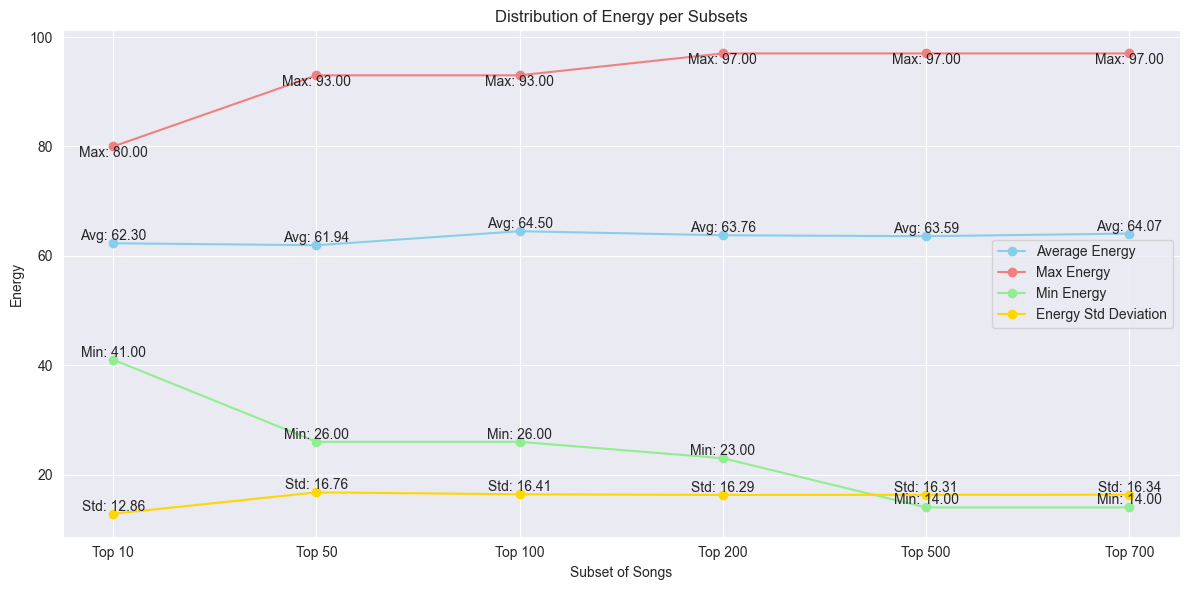

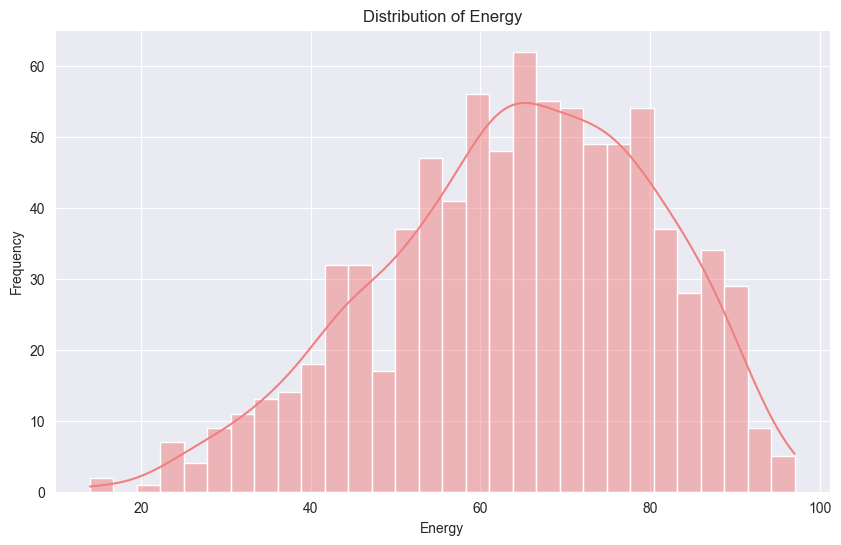

In [464]:
energy_min = []
energy_max = []
energy_avg = []
energy_std = []

for df_da in dataframes:
    energy_min.append(df_da['energy'].min())
    energy_max.append(df_da['energy'].max())
    energy_avg.append(df_da['energy'].mean())
    energy_std.append(df_da['energy'].std())

plt.figure(figsize=(12, 6))

# Line for average Energy
plt.plot(labels, energy_avg, marker='o', linestyle='-', color='skyblue', label='Average Energy')

# Line for max Energy
plt.plot(labels, energy_max, marker='o', linestyle='-', color='lightcoral', label='Max Energy')

# Line for min Energy
plt.plot(labels, energy_min, marker='o', linestyle='-', color='lightgreen', label='Min Energy')

# Line for std Energy
plt.plot(labels, energy_std, marker='o', linestyle='-', color='gold', label='Energy Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Energy')
plt.title('Distribution of Energy per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(energy_avg, energy_max, energy_min, energy_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(songs['energy'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.grid(True)
plt.show()

# ----------------------------------------- Summary ------------------------------------------------------


In examining energy statistics across different subsets of songs based on stream counts, several key findings emerge:

## Average Energy Trends:

- There is a subtle increase in average energy as the size of the subset increases, suggesting a potential positive correlation between higher energy and higher stream counts.

## Maximum Energy Variation:

- The maximum energy values exhibit variability across subsets, indicating a diverse range of energy levels in popular songs across different popularity tiers.

## Minimum Energy Observations:

- The minimum energy values show variability but tend to increase in larger subsets. This suggests that songs with higher energy levels are prevalent in more popular tiers, but there is still diversity in energy across different subsets.

## Energy Standard Deviation Insights:

- The standard deviation decreases with larger subsets, indicating a convergence towards a more consistent energy profile in popular songs with higher stream counts. This suggests a trend towards a common energy characteristic within larger popularity tiers.


# ---------------------------------------------------------------------------------------------------------------


# Analysis: ACOUSTICNESS

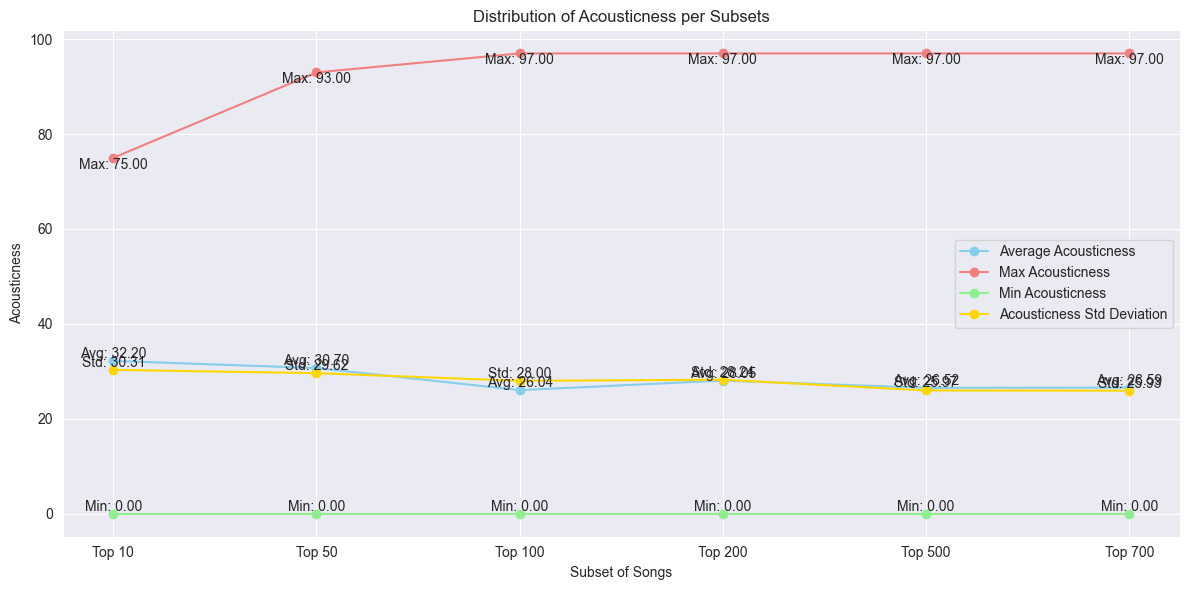

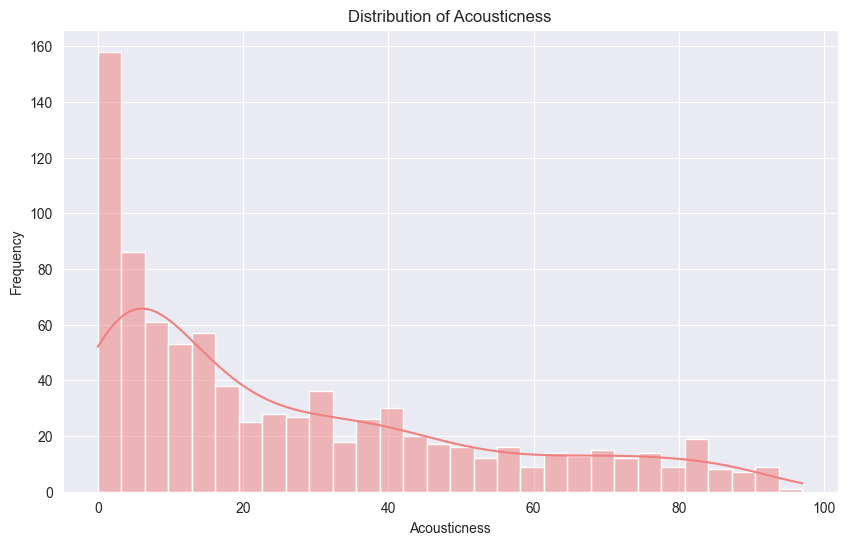

In [465]:
acousticness_min = []
acousticness_max = []
acousticness_avg = []
acousticness_std = []

for df in dataframes:
    acousticness_min.append(df['acousticness'].min())
    acousticness_max.append(df['acousticness'].max())
    acousticness_avg.append(df['acousticness'].mean())
    acousticness_std.append(df['acousticness'].std())

plt.figure(figsize=(12, 6))

# Line for average Acousticness
plt.plot(labels, acousticness_avg, marker='o', linestyle='-', color='skyblue', label='Average Acousticness')

# Line for max Acousticness
plt.plot(labels, acousticness_max, marker='o', linestyle='-', color='lightcoral', label='Max Acousticness')

# Line for min Acousticness
plt.plot(labels, acousticness_min, marker='o', linestyle='-', color='lightgreen', label='Min Acousticness')

# Line for std Acousticness
plt.plot(labels, acousticness_std, marker='o', linestyle='-', color='gold', label='Acousticness Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Acousticness')
plt.title('Distribution of Acousticness per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(
        zip(acousticness_avg, acousticness_max, acousticness_min, acousticness_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(songs['acousticness'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness')
plt.grid(True)
plt.show()

# ----------------------------------------- Summary ------------------------------------------------------


In examining acousticness statistics across different subsets of songs based on stream counts, several key observations emerge:

## Average Acousticness Trends:

- There is a notable decrease in average acousticness as the size of the subset increases, indicating a potential correlation between lower acousticness and higher stream counts.

## Maximum Acousticness Range:

- The maximum acousticness values exhibit variability across subsets, suggesting a diverse range of acoustic characteristics in popular songs across different popularity tiers.

## Minimum Acousticness Observations:

- The minimum acousticness values consistently remain at 0.00 across subsets. This suggests that songs with lower acoustic elements are prevalent in popular tiers, and acousticness is not a significant hindrance to popularity.

## Acousticness Standard Deviation Insights:

- The standard deviation shows variability across subsets, indicating a diversity of acoustic profiles. However, as the subset size increases, there is a tendency towards a more consistent acousticness profile in popular songs with higher stream counts.

# ---------------------------------------------------------------------------------------------------------------
